In [1]:
from PL_MMD_AAE import *
import json
exp_name = 'MMD_AAE/v1'
exp_name = 'resnet/resnet18_v1'
f = open(f'/root/configs/'+ exp_name + '.json')
        # f = open(f'/root/autoencoder_denoiser/configs_baseline_selection/'+ name + '.json')
        # global config
        
config = json.load(f)
model = MMD_AAE(config)

input = torch.rand([16,2,256])

In [2]:
# model.encoder.avgpool = nn.AdaptiveAvgPool1d(output_size=1)

In [3]:
logit, output_feature = model(input, feat = True)
output_feature.shape

torch.Size([16, 512, 8])

In [4]:
from  model_factory import *
# up1 = Up(in_channels=512, out_channels= 256, linear= True)
# f1 = up1(output_feature)
decoder = Decoder(256, 2, True)

In [5]:
f1 = decoder(output_feature)
f1.shape

torch.Size([16, 2, 256])

In [6]:
f2 = up1.conv.double_conv(f1)

NameError: name 'up1' is not defined

In [ ]:
f2.shape

In [ ]:
up1

In [5]:
a = 0.23423
if a:
    print("sdf")

sdf


In [15]:
import np as np
def fspecial_gauss(size, sigma):

    """Function to mimic the 'fspecial' gaussian MATLAB function
    """

    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g
fspecial_gauss(3, 0.4)

array([[0.00193045, 0.04393693, 0.00193045],
       [0.04393693, 1.        , 0.04393693],
       [0.00193045, 0.04393693, 0.00193045]])

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [6]:
import torchvision, torch
num_channels = 1
conv = torchvision.ops.DeformConv2d(in_channels=num_channels, out_channels=num_channels, kernel_size=3, padding=1)
a = torch.rand((4,1,3,3))
a.shape

tensor([[[[0.2239, 0.0379, 0.2276],
          [0.5059, 0.0491, 0.8847],
          [0.7270, 0.9974, 0.7017]]],


        [[[0.3196, 0.6913, 0.9985],
          [0.5852, 0.5522, 0.3204],
          [0.5309, 0.8884, 0.2540]]],


        [[[0.9782, 0.5833, 0.5246],
          [0.9165, 0.0190, 0.7923],
          [0.2905, 0.0981, 0.8100]]],


        [[[0.0870, 0.2357, 0.6431],
          [0.6904, 0.8649, 0.6228],
          [0.4813, 0.7829, 0.7411]]]])

In [9]:
# offset = torch.tensor([
#     [0,0,0],
#     [0,0,0],
#     [0,0,0]
# ])
offset = torch.rand((4,2*3*3,3,3))
conv(a, offset=offset,).shape

torch.Size([4, 1, 3, 3])

In [19]:
import numpy as np
import scipy.fftpack


def fftind(size):
    """ Returns a np array of shifted Fourier coordinates k_x k_y.
        
        Input args:
            size (integer): The size of the coordinate array to create
        Returns:
            k_ind, np array of shape (2, size, size) with:
                k_ind[0,:,:]:  k_x components
                k_ind[1,:,:]:  k_y components
                
        Example:
        
            print(fftind(5))
            
            [[[ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]]

            [[ 0  0  0  0  0]
            [ 1  1  1  1  1]
            [-3 -3 -3 -3 -3]
            [-2 -2 -2 -2 -2]
            [-1 -1 -1 -1 -1]]]
            
        """
    k_ind = np.mgrid[:size, :size] - int( (size + 1)/2 )
    k_ind = scipy.fftpack.fftshift(k_ind)
    return( k_ind )

def gaussian_random_field(alpha = 10.0,
                          size = 3, 
                          flag_normalize = True):
    """ Returns a np array of shifted Fourier coordinates k_x k_y.
        
        Input args:
            alpha (double, default = 3.0): 
                The power of the power-law momentum distribution
            size (integer, default = 128):
                The size of the square output Gaussian Random Fields
            flag_normalize (boolean, default = True):
                Normalizes the Gaussian Field:
                    - to have an average of 0.0
                    - to have a standard deviation of 1.0

        Returns:
            gfield (np array of shape (size, size)):
                The random gaussian random field
                
        Example:
        import matplotlib
        import matplotlib.pyplot as plt
        example = gaussian_random_field()
        plt.imshow(example)
        """
        
        # Defines momentum indices
    k_idx = fftind(size)

        # Defines the amplitude as a power law 1/|k|^(alpha/2)
    amplitude = np.power( k_idx[0]**2 + k_idx[1]**2 + 1e-10, -alpha/4.0 )
    amplitude[0,0] = 0
    
        # Draws a complex gaussian random noise with normal
        # (circular) distribution
    noise = np.random.normal(size = (size, size)) \
        + 1j * np.random.normal(size = (size, size))
    
        # To real space
    gfield = np.fft.ifft2(noise * amplitude).real
    
        # Sets the standard deviation to one
    if flag_normalize:
        gfield = gfield - np.mean(gfield)
        gfield = gfield/np.std(gfield)
        
    return gfield

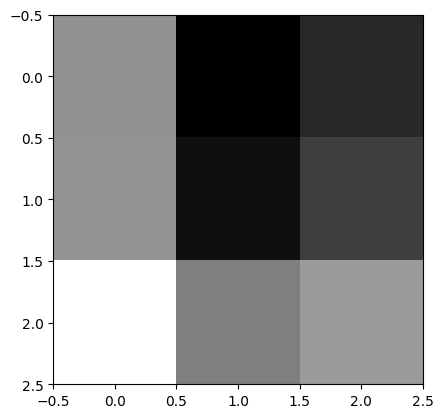

(3, 3)

In [20]:
import matplotlib
import matplotlib.pyplot as plt
example = gaussian_random_field()
plt.imshow(example, cmap='gray')
plt.show()
example.shape

In [21]:
example

array([[ 0.51048075, -1.3591392 , -0.83406963],
       [ 0.54100506, -1.15942948, -0.56067401],
       [ 1.93702543,  0.28148159,  0.64331949]])

In [71]:
def GRF_wrapper(a):
    return gaussian_random_field()



GRF_nums =  (3**2)
offset_place_holder = np.zeros((4, GRF_nums,1))
offset = np.apply_along_axis(GRF_wrapper, 2, offset_place_holder)
offset.shape


(4, 9, 3, 3)

In [62]:
import torch
x = torch.tensor([[
    [
        [1,2,3],
        [4,5,6],
        [7,8,9]
    ],
    [
        [1,1,1],
        [1,1,1],
        [1,1,1]
    ],
    ]]).float()
x.shape
# (x - x.mean([2, 3])) / x.std([2, 3])

torch.Size([1, 2, 3, 3])

In [69]:
x[:]-x.mean([2, 3])


RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 3

In [57]:
torch.var(torch.tensor([
        [1,2,3],
        [4,5,6],
        [7,8,9]
    ]).float())

tensor(7.5000)

In [59]:
torch.var(torch.tensor([1,2,3,4,5,6,7,8,9]).float())

tensor(7.5000)

In [72]:
from torchvision import transforms
x = torch.rand([64,3, 244, 244])
print("x after conv shape ", x.shape)
transform_norm = transforms.Compose([
    transforms.Normalize(x.mean([2, 3]), x.std([2, 3]))
])
x = transform_norm(x)

x after conv shape  torch.Size([64, 3, 244, 244])


RuntimeError: The size of tensor a (244) must match the size of tensor b (3) at non-singleton dimension 3

In [79]:
x.mean(dim=[2, 3]).shape

torch.Size([64, 3])